# Assignment

## Problem

The objective of this project is develop a predictive classifier to predict the next-day rain on the target variable RainTomorrow

## Group Members
<center>

| S.No. | Name | Student ID |
| --- | --- | --- |
|  1 | Hemang Sharma | 24695785 |
|  2 |  Jyoti Khurana| 14075648 |
|  3 | Mahjabeen Mohiuddin | 24610507 |
|  4 | Suyash Santosh Tapase | 24678207 |

</center>

## Library used 

<ol>
    <li>pandas</li>
    <li>numpy</li>
    <li>matplotlib</li>
    <li>seaborn</li>
    <li>plotly</li>
    <li>sklearn</li>
</ol>


### Link for DataSet & Source & Acknowledgements
<ul><b>Observations were drawn from numerous weather stations</b>
    <li>The daily observations are available from <a         href="http://www.bom.gov.au/climate/data">http://www.bom.gov.au/climate/data</a> </li>
    <li>Definitions adapted from <a href="http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml">http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml</a> </li>
</ul>
<ul><b>Data source</b>
    <li><a href="http://www.bom.gov.au/climate/data">http://www.bom.gov.au/climate/data</a></li>
    <li><a href="https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data">https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data </a></li>
</ul>

## Importing packages
We will import all the required packages and define our dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

## Dataset
In this step we will describe the data in the dataset

This dataset contains about 10 years of daily weather observations from many locations across Australia.


### Data Description
<br>
Location - Name of the city from Australia. .<br>
MinTemp - The Minimum temperature during a particular day. (degree Celsius)<br>
MaxTemp - The maximum temperature during a particular day. (degree Celsius)<br>
MeanTemp - The mean temperature during a particular day. (degree Celsius)<br>
Rainfall - Rainfall during a particular day. (millimeters)<br>
Evaporation - Evaporation during a particular day. (millimeters)<br>
Sunshine - Bright sunshine during a particular day. (hours)<br>
WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)<br>
WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)<br>
WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)<br>
WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)<br>
WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)<br>
WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)<br>
Humidity9am - The humidity of the wind at 9 am. (percent)<br>
Humidity3pm - The humidity of the wind at 3 pm. (percent)<br>
AvgHumidity - The average of humidity of the wind. (percent)<br>
Pressure9am - Atmospheric pressure at 9 am. (hectopascals)<br>
Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)<br>
AvgPressure - The average Atmospheric pressure. (hectopascals)<br>
Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)<br>
Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)<br>
Temp9am - The temperature at 9 am. (degree Celsius)<br>
Temp3pm - The temperature at 3 pm. (degree Celsius)<br>
RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.<br>
RainTomorrow - This is will be the variable containing value of "if tomorrow is rainy then 1 (Yes) or if tomorrow is not rainy then 0 (No)"<br>

In [2]:
df_train = pd.read_csv('WeatherTrainingData.csv')
df_test = pd.read_csv('WeatherTestData.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(99516, 26)
(42677, 25)


In [4]:
df_train

row ID Location  MinTemp  MaxTemp  MeanTemp  Rainfall  Evaporation  \
0           0   Albury     13.4     22.9     18.20       0.6          NaN   
1           1   Albury      7.4     25.1     16.30       0.0          NaN   
2           2   Albury     17.5     32.3     24.90       1.0          NaN   
3           3   Albury     14.6     29.7     22.20       0.2          NaN   
4           4   Albury      7.7     26.7     17.20       0.0          NaN   
...       ...      ...      ...      ...       ...       ...          ...   
99511   99511    Uluru      8.0     20.7     14.35       0.0          NaN   
99512   99512    Uluru      3.5     21.8     12.70       0.0          NaN   
99513   99513    Uluru      2.8     23.4     13.10       0.0          NaN   
99514   99514    Uluru      3.6     25.3     14.50       0.0          NaN   
99515   99515    Uluru      5.4     26.9     16.20       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed  ... AvgHumidity Pressure9am  \
0           NaN           W           44.0  ...        46.5      1007.7   
1           NaN         WNW           44.0  ...        34.5      1010.6   
2           NaN           W           41.0  ...        57.5      1010.8   
3           NaN         WNW           56.0  ...        39.0      1009.2   
4           NaN           W           35.0  ...        33.5      1013.4   
...         ...         ...            ...  ...         ...         ...   
99511       NaN         ESE           41.0  ...        44.0      1028.1   
99512       NaN           E           31.0  ...        43.0      1024.7   
99513       NaN           E           31.0  ...        37.5      1024.6   
99514       NaN         NNW           22.0  ...        38.5      1023.5   
99515       NaN           N           37.0  ...        38.5      1021.0   

       Pressure3pm  AvgPressure  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1007.1       1007.4       8.0       NaN     16.9     21.8   
1           1007.8       1009.2       NaN       NaN     17.2     24.3   
2           1006.0       1008.4       7.0       8.0     17.8     29.7   
3           1005.4       1007.3       NaN       NaN     20.6     28.9   
4           1010.1       1011.8       NaN       NaN     16.3     25.5   
...            ...          ...       ...       ...      ...      ...   
99511       1024.3       1026.2       NaN       7.0     11.6     20.0   
99512       1021.2       1023.0       NaN       NaN      9.4     20.9   
99513       1020.3       1022.5       NaN       NaN     10.1     22.4   
99514       1019.1       1021.3       NaN       NaN     10.9     24.5   
99515       1016.8       1018.9       NaN       NaN     12.5     26.1   

       RainToday  RainTomorrow  
0             No             0  
1             No             0  
2             No             0  
3             No             0  
4             No             0  
...          ...           ...  
99511         No             0  
99512         No             0  
99513         No             0  
99514         No             0  
99515         No             0  

[99516 rows x 26 columns]

## Data Cleaning

Now in order to use this data, we need to clean the data and remove all the empty cells from the dataset. So we will use dropna( )

In [5]:
data_test=df_test
data_train=df_train
data_test['RainToday'] = data_test['RainToday'].map({'Yes': 1, 'No': 0})

In [6]:
data_test

row ID Location  MinTemp  MaxTemp  MeanTemp  Rainfall  Evaporation  \
0           0   Albury     12.9     25.7     19.30       0.0          NaN   
1           1   Albury      9.2     28.0     18.60       0.0          NaN   
2           2   Albury     14.3     25.0     19.65       0.0          NaN   
3           3   Albury      9.7     31.9     20.80       0.0          NaN   
4           4   Albury     15.9     18.6     17.30      15.6          NaN   
...       ...      ...      ...      ...       ...       ...          ...   
42672   42672    Uluru      2.4     19.1     10.80       0.0          NaN   
42673   42673    Uluru      2.3     21.4     11.90       0.0          NaN   
42674   42674    Uluru      2.6     22.5     12.60       0.0          NaN   
42675   42675    Uluru      7.4     20.6     14.00       0.0          NaN   
42676   42676    Uluru      7.8     27.0     17.40       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm AvgHumidity  \
0           NaN         WSW           46.0  ...        30.0        34.0   
1           NaN          NE           24.0  ...        16.0        30.5   
2           NaN           W           50.0  ...        19.0        34.0   
3           NaN         NNW           80.0  ...         9.0        25.5   
4           NaN           W           61.0  ...        93.0        84.5   
...         ...         ...            ...  ...         ...         ...   
42672       NaN           E           33.0  ...        24.0        41.5   
42673       NaN          SE           22.0  ...        28.0        44.0   
42674       NaN           S           19.0  ...        24.0        41.5   
42675       NaN           E           35.0  ...        33.0        48.0   
42676       NaN          SE           28.0  ...        24.0        37.5   

       Pressure9am  Pressure3pm  AvgPressure  Cloud9am  Cloud3pm  Temp9am  \
0           1007.6       1008.7      1008.20       NaN       2.0     21.0   
1           1017.6       1012.8      1015.20       NaN       NaN     18.1   
2           1009.6       1008.2      1008.90       1.0       NaN     18.1   
3           1008.9       1003.6      1006.30       NaN       NaN     18.3   
4            994.3        993.0       993.65       8.0       8.0     17.4   
...            ...          ...          ...       ...       ...      ...   
42672       1030.0       1026.2      1028.10       NaN       NaN      8.0   
42673       1026.9       1022.8      1024.90       NaN       NaN      8.9   
42674       1025.0       1021.4      1023.20       NaN       NaN      8.8   
42675       1027.2       1023.3      1025.30       NaN       NaN     11.0   
42676       1019.4       1016.5      1018.00       3.0       2.0     15.1   

       Temp3pm  RainToday  
0         23.2        0.0  
1         26.5        0.0  
2         24.6        0.0  
3         30.2        0.0  
4         15.8        1.0  
...        ...        ...  
42672     18.8        0.0  
42673     20.3        0.0  
42674     22.1        0.0  
42675     20.3        0.0  
42676     26.0        0.0  

[42677 rows x 25 columns]

In [7]:
data_test.drop(columns=['Sunshine', 'Evaporation'], inplace=True)
categorical = data_test.select_dtypes(include = "object").columns
cleaner = ColumnTransformer([
    ('categorical_transformer', SimpleImputer(strategy='most_frequent'), categorical)
])
data_test[categorical] = cleaner.fit_transform(data_test[categorical])
null_columns=data_test.columns[data_test.isnull().any()]
data_test[null_columns].isnull().sum()

MinTemp            194
MaxTemp             92
Rainfall           427
WindGustSpeed     2790
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64

In [8]:
# Remove rows with missing data
data_test_clean = data_test.dropna()
# Print the cleaned dataset
print("Cleaned dataset:")
print(data_test_clean)

Cleaned dataset:
       row ID Location  MinTemp  MaxTemp  MeanTemp  Rainfall WindGustDir  \
4           4   Albury     15.9     18.6      17.3      15.6           W   
16         16   Albury     24.4     34.0      29.2       0.6          NW   
22         22   Albury     18.4     31.2      24.8       0.4          SE   
23         23   Albury     16.1     21.6      18.9       0.0          SE   
26         26   Albury      8.9     31.9      20.4       0.0         WNW   
...       ...      ...      ...      ...       ...       ...         ...   
42656   42656    Uluru     15.6     27.3      21.5       0.0         SSE   
42667   42667    Uluru     14.6     26.3      20.5       0.0           S   
42668   42668    Uluru     14.3     27.6      21.0       0.4         WNW   
42670   42670    Uluru     12.7     22.2      17.5       0.0           E   
42676   42676    Uluru      7.8     27.0      17.4       0.0          SE   

       WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  AvgHumid

# Data Analysis

Now we will plot graphs comparing diffrent characteristics of our dataset 

## 1. Feature Distribution

In [9]:
X = df_train.drop(columns=['RainTomorrow'])
y = df_train['RainTomorrow']
df = pd.concat([X, df_test], axis=0)

In [10]:
df.describe().T

count          mean           std    min      25%       50%  \
row ID         142193.0  41227.832566  28156.744372    0.0  17774.0  35548.00   
MinTemp        141556.0     12.186400      6.403283   -8.5      7.6     12.00   
MaxTemp        141871.0     23.226784      7.117618   -4.8     17.9     22.60   
MeanTemp       142193.0     17.672565      6.328795   -6.2     12.9     17.35   
Rainfall       140787.0      2.349974      8.465173    0.0      0.0      0.00   
Evaporation     56985.0      5.461320      4.162490    0.0      2.6      4.80   
Sunshine        52199.0      7.615090      3.783008    0.0      4.8      8.40   
WindGustSpeed  132923.0     39.984292     13.588801    6.0     31.0     39.00   
WindSpeed9am   140845.0     14.001988      8.893337    0.0      7.0     13.00   
WindSpeed3pm   139563.0     18.637576      8.803345    0.0     13.0     19.00   
Humidity9am    140419.0     68.843810     19.051293    0.0     57.0     70.00   
Humidity3pm    138583.0     51.482606     20.797772    0.0     37.0     52.00   
AvgHumidity    142193.0     59.080240     19.084638    0.0     47.0     60.50   
Pressure9am    128179.0   1017.653758      7.105476  980.5   1012.9   1017.60   
Pressure3pm    128212.0   1015.258204      7.036677  977.1   1010.4   1015.20   
AvgPressure    142193.0    916.413905    301.650595    0.0   1009.8   1015.50   
Cloud9am        88536.0      4.437189      2.887016    0.0      1.0      5.00   
Cloud3pm        85099.0      4.503167      2.720633    0.0      2.0      5.00   
Temp9am        141289.0     16.987509      6.492838   -7.2     12.3     16.70   
Temp3pm        139467.0     21.687235      6.937594   -5.4     16.6     21.10   

                   75%      max  
row ID         63967.0  99515.0  
MinTemp           16.8     33.9  
MaxTemp           28.2     48.1  
MeanTemp          22.3     38.8  
Rainfall           0.8    371.0  
Evaporation        7.4     86.2  
Sunshine          10.6     14.5  
WindGustSpeed     48.0    135.0  
WindSpeed9am      19.0    130.0  
WindSpeed3pm      24.0     87.0  
Humidity9am       83.0    100.0  
Humidity3pm       66.0    100.0  
AvgHumidity       72.5    100.0  
Pressure9am     1022.4   1041.0  
Pressure3pm     1020.0   1039.6  
AvgPressure     1020.6   1040.1  
Cloud9am           7.0      9.0  
Cloud3pm           7.0      9.0  
Temp9am           21.6     40.2  
Temp3pm           26.4     46.7

In [11]:
df.drop(columns='row ID', inplace=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Sunshine       89994  0.632900
Evaporation    85208  0.599242
Cloud3pm       57094  0.401525
Cloud9am       53657  0.377353
Pressure9am    14014  0.098556
Pressure3pm    13981  0.098324
WindGustSpeed   9270  0.065193
WindDir9am      7006  0.049271
WindGustDir     6521  0.045860
Humidity3pm     3610  0.025388
Temp3pm         2726  0.019171
WindDir3pm      2648  0.018623
WindSpeed3pm    2630  0.018496
Humidity9am     1774  0.012476
RainToday       1406  0.009888
Rainfall        1406  0.009888
WindSpeed9am    1348  0.009480
Temp9am          904  0.006358
MinTemp          637  0.004480
MaxTemp          322  0.002265
AvgHumidity        0  0.000000
AvgPressure        0  0.000000
MeanTemp           0  0.000000
Location           0  0.000000

In [12]:
df.drop(columns=['Sunshine', 'Evaporation'], inplace=True)
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
MeanTemp         float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
AvgHumidity      float64
Pressure9am      float64
Pressure3pm      float64
AvgPressure      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [13]:
categorical = df.select_dtypes(include = "object").columns
cleaner = ColumnTransformer([
    ('categorical_transformer', SimpleImputer(strategy='most_frequent'), categorical)
])
df[categorical] = cleaner.fit_transform(df[categorical])

null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [14]:
df = df.fillna(df.median())
df.isnull().sum()

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_20957/1273592041.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


Location         0
MinTemp          0
MaxTemp          0
MeanTemp         0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
AvgHumidity      0
Pressure9am      0
Pressure3pm      0
AvgPressure      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [15]:
categorical = df.select_dtypes(include = "object").columns
for i in range(len(categorical)):
    print(df[categorical[i]].value_counts())
    print('************************************\n')

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [16]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])

df


Location  MinTemp  MaxTemp  MeanTemp  Rainfall  WindGustDir  \
0             2     13.4     22.9      18.2       0.6           13   
1             2      7.4     25.1      16.3       0.0           14   
2             2     17.5     32.3      24.9       1.0           13   
3             2     14.6     29.7      22.2       0.2           14   
4             2      7.7     26.7      17.2       0.0           13   
...         ...      ...      ...       ...       ...          ...   
42672        41      2.4     19.1      10.8       0.0            0   
42673        41      2.3     21.4      11.9       0.0            9   
42674        41      2.6     22.5      12.6       0.0            8   
42675        41      7.4     20.6      14.0       0.0            0   
42676        41      7.8     27.0      17.4       0.0            9   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0               44.0          13          14          20.0  ...         22.0   
1               44.0           6          15           4.0  ...         25.0   
2               41.0           1           7           7.0  ...         33.0   
3               56.0          13          13          19.0  ...         23.0   
4               35.0          10          13           6.0  ...         19.0   
...              ...         ...         ...           ...  ...          ...   
42672           33.0           9           0          17.0  ...         24.0   
42673           22.0           9          10          11.0  ...         28.0   
42674           19.0           8           0           9.0  ...         24.0   
42675           35.0           2           0          15.0  ...         33.0   
42676           28.0          10           3          13.0  ...         24.0   

       AvgHumidity  Pressure9am  Pressure3pm  AvgPressure  Cloud9am  Cloud3pm  \
0             46.5       1007.7       1007.1       1007.4       8.0       5.0   
1             34.5       1010.6       1007.8       1009.2       5.0       5.0   
2             57.5       1010.8       1006.0       1008.4       7.0       8.0   
3             39.0       1009.2       1005.4       1007.3       5.0       5.0   
4             33.5       1013.4       1010.1       1011.8       5.0       5.0   
...            ...          ...          ...          ...       ...       ...   
42672         41.5       1030.0       1026.2       1028.1       5.0       5.0   
42673         44.0       1026.9       1022.8       1024.9       5.0       5.0   
42674         41.5       1025.0       1021.4       1023.2       5.0       5.0   
42675         48.0       1027.2       1023.3       1025.3       5.0       5.0   
42676         37.5       1019.4       1016.5       1018.0       3.0       2.0   

       Temp9am  Temp3pm  RainToday  
0         16.9     21.8          2  
1         17.2     24.3          2  
2         17.8     29.7          2  
3         20.6     28.9          2  
4         16.3     25.5          2  
...        ...      ...        ...  
42672      8.0     18.8          0  
42673      8.9     20.3          0  
42674      8.8     22.1          0  
42675     11.0     20.3          0  
42676     15.1     26.0          0  

[142193 rows x 22 columns]

In [17]:
train = df.iloc[:99516,:]
new_train = pd.concat([train, y], axis=1)
test = df.iloc[99516:, :]
new_train

Location  MinTemp  MaxTemp  MeanTemp  Rainfall  WindGustDir  \
0             2     13.4     22.9     18.20       0.6           13   
1             2      7.4     25.1     16.30       0.0           14   
2             2     17.5     32.3     24.90       1.0           13   
3             2     14.6     29.7     22.20       0.2           14   
4             2      7.7     26.7     17.20       0.0           13   
...         ...      ...      ...       ...       ...          ...   
99511        41      8.0     20.7     14.35       0.0            2   
99512        41      3.5     21.8     12.70       0.0            0   
99513        41      2.8     23.4     13.10       0.0            0   
99514        41      3.6     25.3     14.50       0.0            6   
99515        41      5.4     26.9     16.20       0.0            3   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  AvgHumidity  \
0               44.0          13          14          20.0  ...         46.5   
1               44.0           6          15           4.0  ...         34.5   
2               41.0           1           7           7.0  ...         57.5   
3               56.0          13          13          19.0  ...         39.0   
4               35.0          10          13           6.0  ...         33.5   
...              ...         ...         ...           ...  ...          ...   
99511           41.0           9           0          19.0  ...         44.0   
99512           31.0           2           0          15.0  ...         43.0   
99513           31.0           9           1          13.0  ...         37.5   
99514           22.0           9           3          13.0  ...         38.5   
99515           37.0           9          14           9.0  ...         38.5   

       Pressure9am  Pressure3pm  AvgPressure  Cloud9am  Cloud3pm  Temp9am  \
0           1007.7       1007.1       1007.4       8.0       5.0     16.9   
1           1010.6       1007.8       1009.2       5.0       5.0     17.2   
2           1010.8       1006.0       1008.4       7.0       8.0     17.8   
3           1009.2       1005.4       1007.3       5.0       5.0     20.6   
4           1013.4       1010.1       1011.8       5.0       5.0     16.3   
...            ...          ...          ...       ...       ...      ...   
99511       1028.1       1024.3       1026.2       5.0       7.0     11.6   
99512       1024.7       1021.2       1023.0       5.0       5.0      9.4   
99513       1024.6       1020.3       1022.5       5.0       5.0     10.1   
99514       1023.5       1019.1       1021.3       5.0       5.0     10.9   
99515       1021.0       1016.8       1018.9       5.0       5.0     12.5   

       Temp3pm  RainToday  RainTomorrow  
0         21.8          2             0  
1         24.3          2             0  
2         29.7          2             0  
3         28.9          2             0  
4         25.5          2             0  
...        ...        ...           ...  
99511     20.0          2             0  
99512     20.9          2             0  
99513     22.4          2             0  
99514     24.5          2             0  
99515     26.1          2             0  

[99516 rows x 23 columns]

<Axes: >

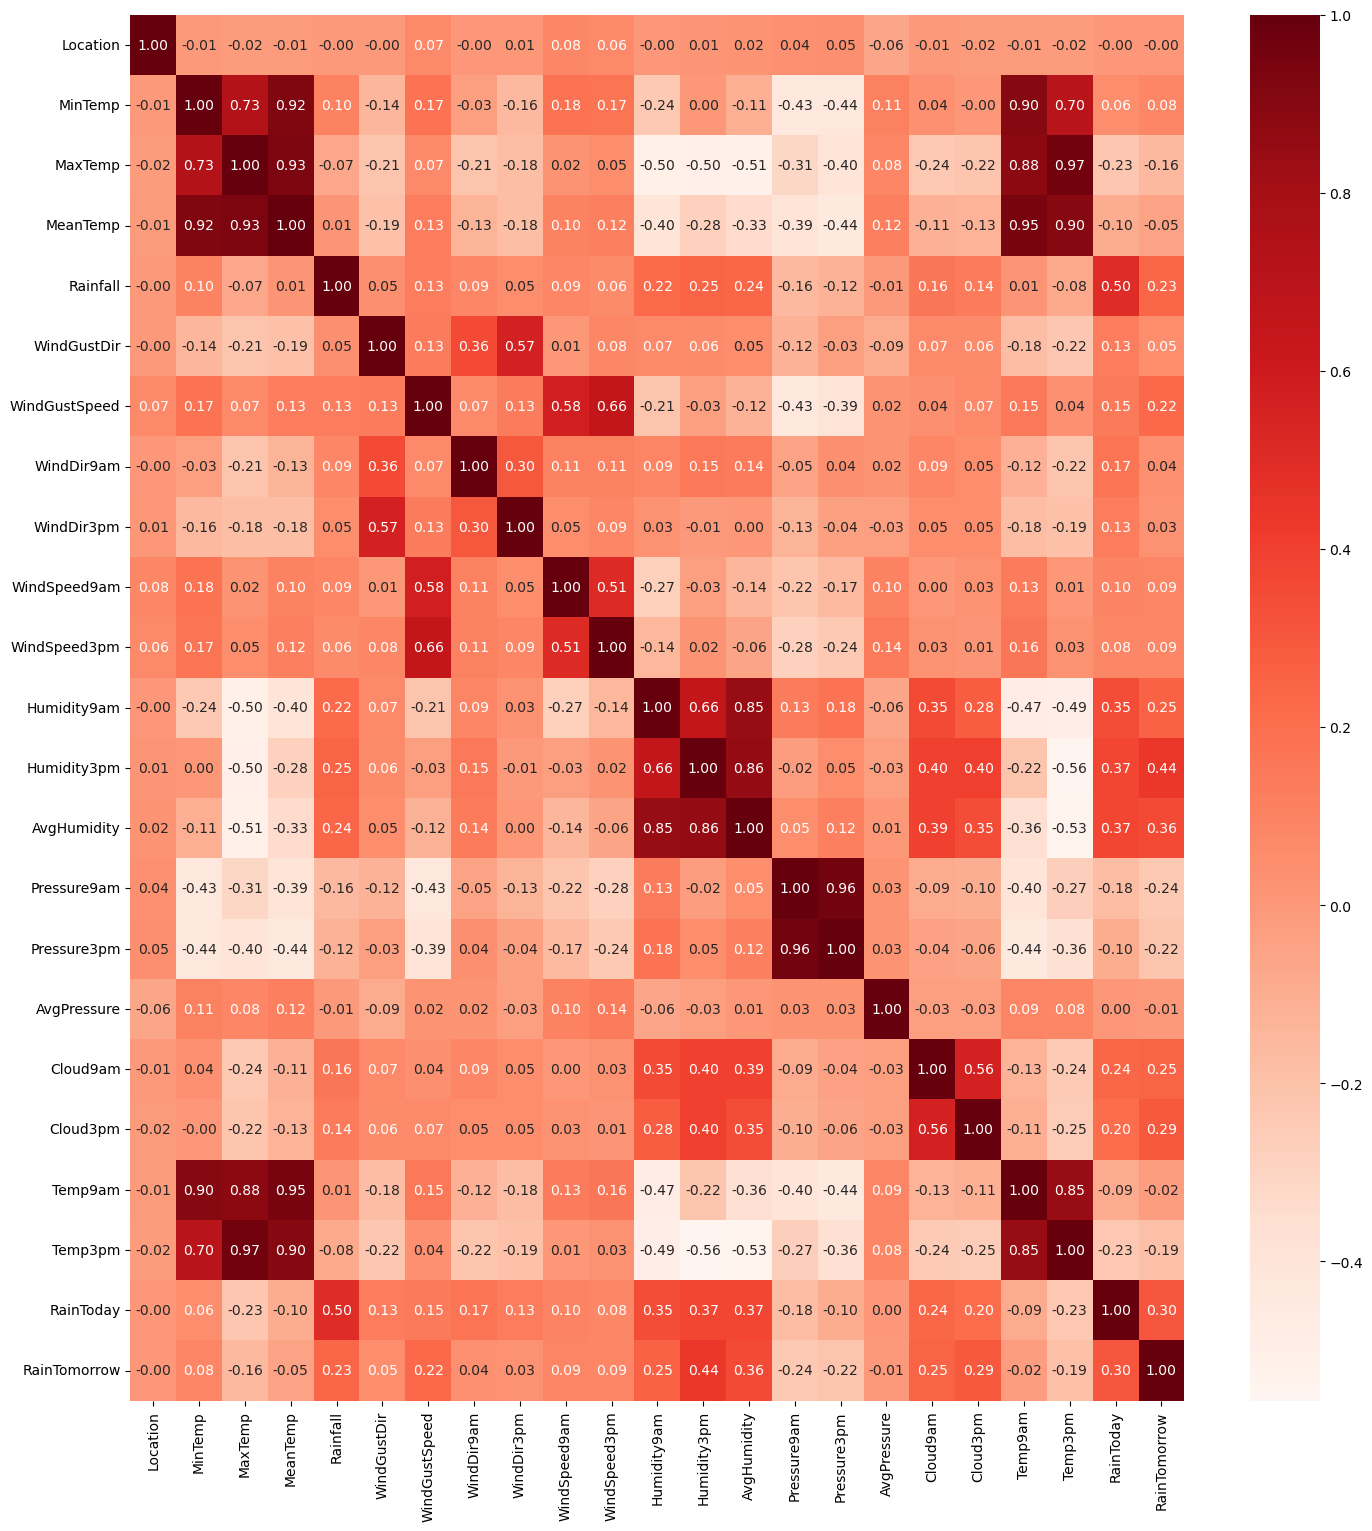

In [18]:
plt.figure(figsize=(17,18))
cor = new_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<Axes: xlabel='Humidity9am', ylabel='Count'>

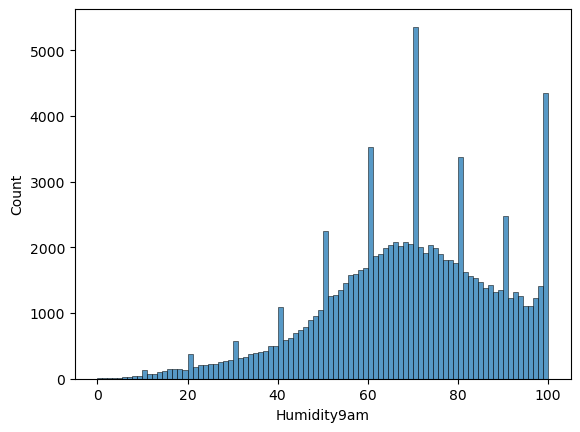

In [19]:
sns.histplot(new_train['Humidity9am'])

<Axes: xlabel='Humidity3pm', ylabel='Count'>

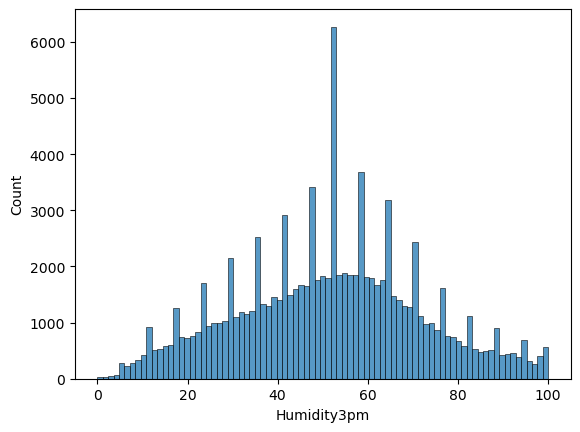

In [20]:
sns.histplot(new_train['Humidity3pm'])

<Axes: xlabel='Cloud9am'>

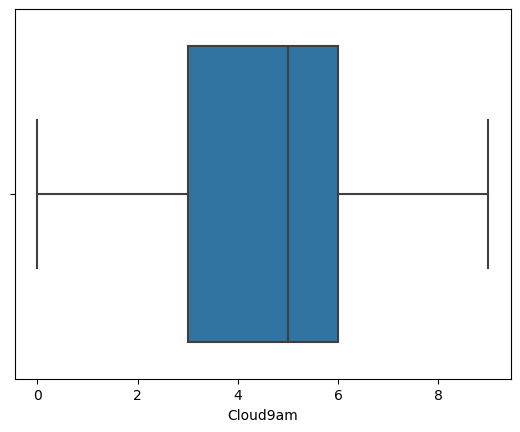

In [21]:
sns.boxplot(x=new_train['Cloud9am'])

<Axes: xlabel='Cloud3pm'>

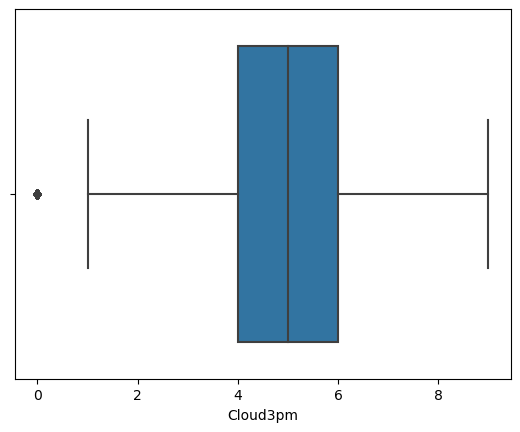

In [22]:
sns.boxplot(x=new_train['Cloud3pm'])

<Axes: xlabel='RainToday', ylabel='count'>

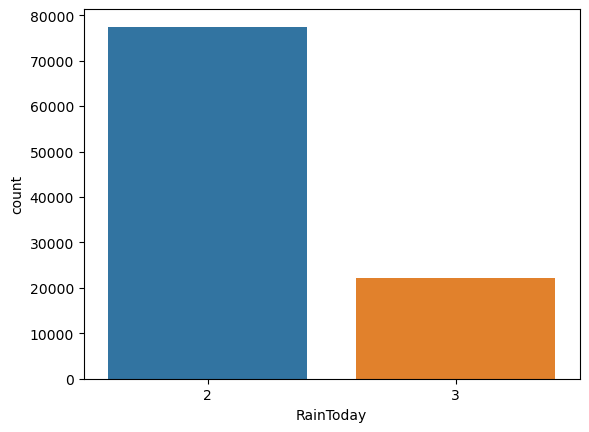

In [23]:
sns.countplot(x=new_train['RainToday'])

In [24]:
new_train['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

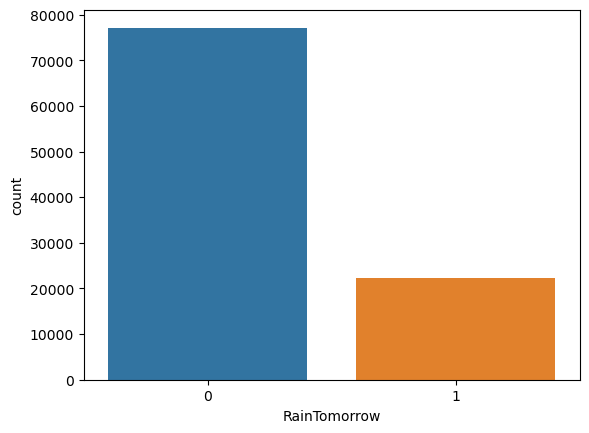

In [25]:
sns.countplot(x=new_train['RainTomorrow'])

In [26]:
df_majority_0 = new_train[(new_train['RainTomorrow']==0)] 
df_minority_1 = new_train[(new_train['RainTomorrow']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 77157, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<Axes: >

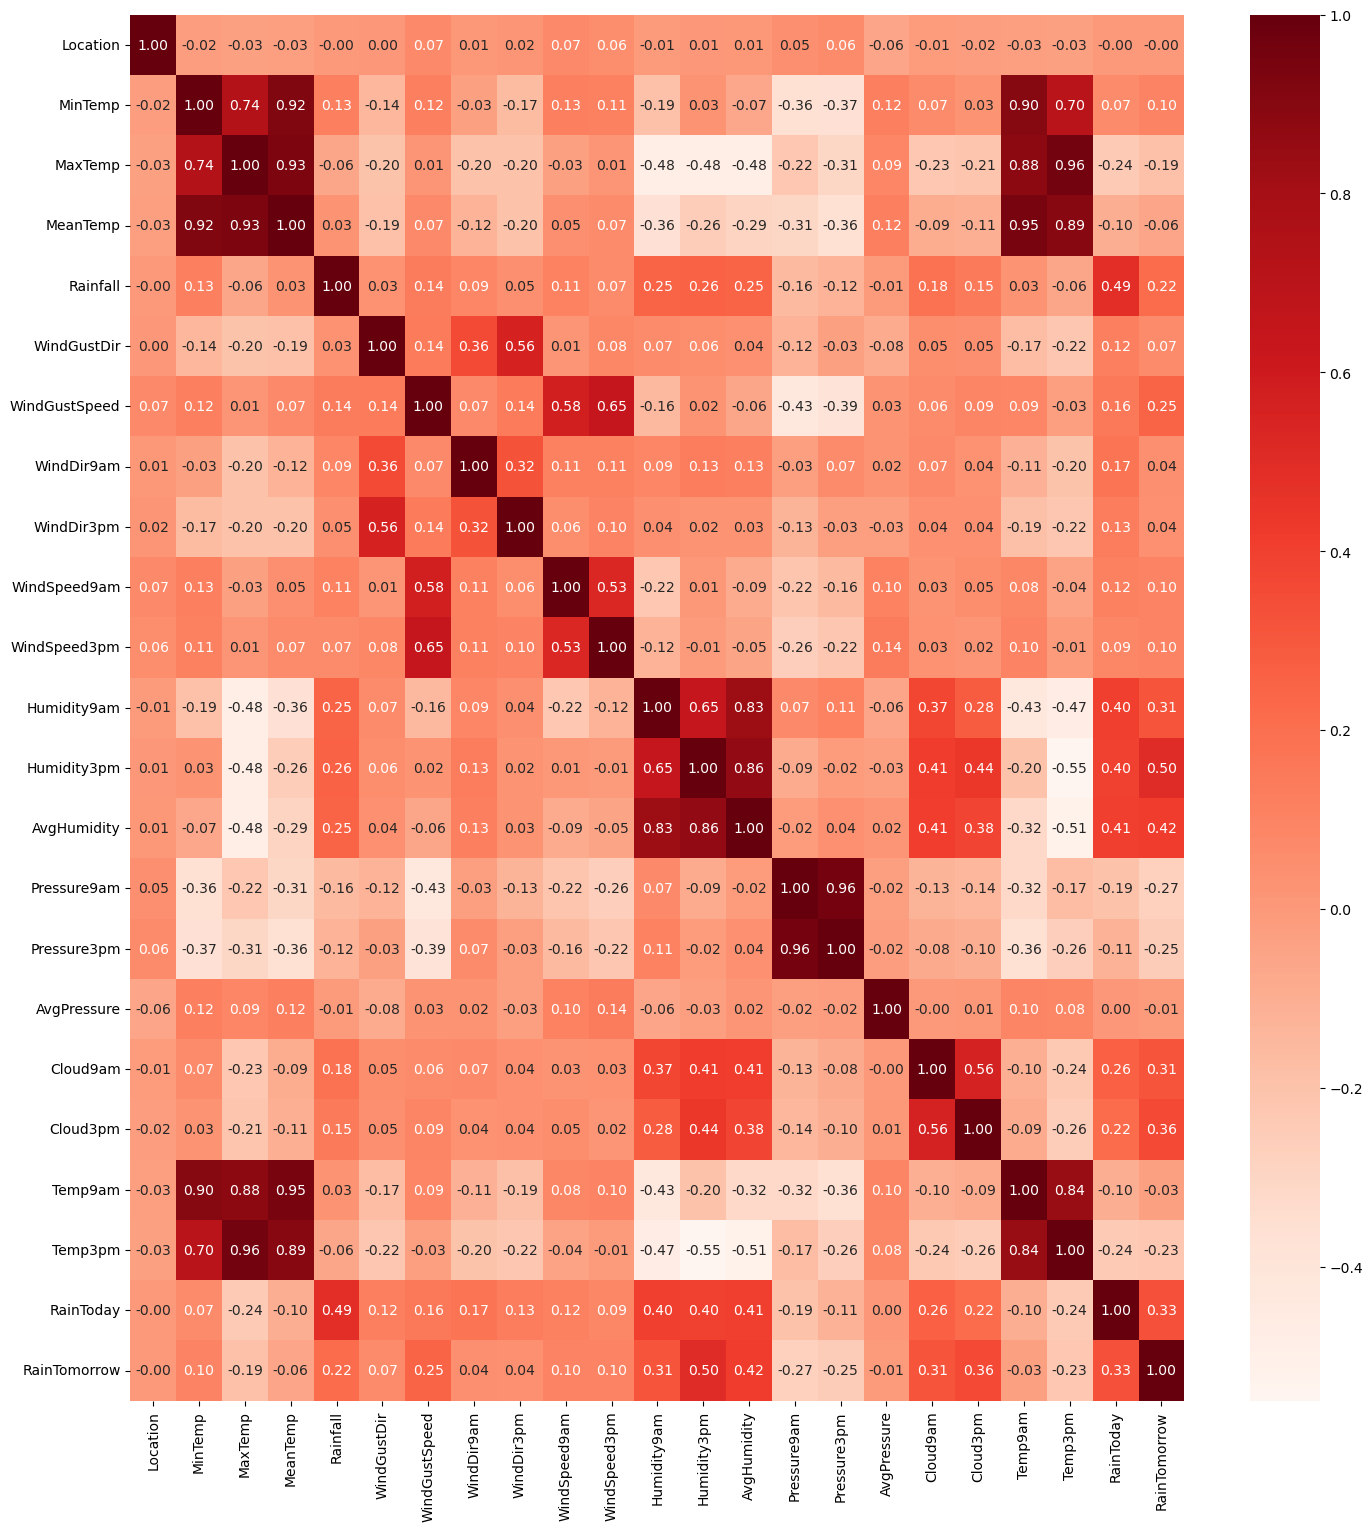

In [27]:
plt.figure(figsize=(17,18))
cor = df_upsampled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<Axes: xlabel='RainTomorrow', ylabel='count'>

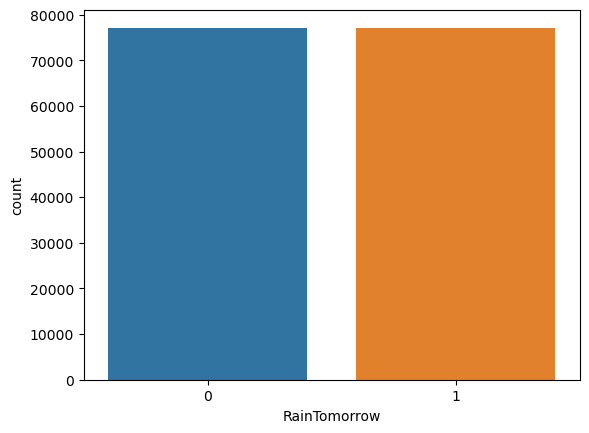

In [28]:
sns.countplot(x=df_upsampled['RainTomorrow'])

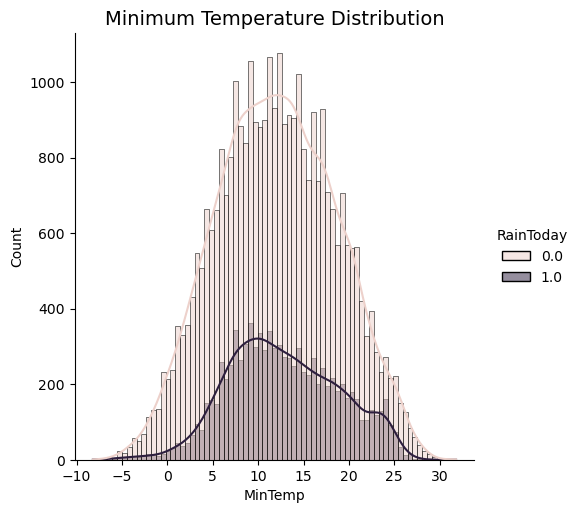

In [29]:
sns.displot(data_test, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

The analysis revealed that the minimum temperature range from -8.5 ℃ to 33.9 ℃ and the minimum temperature of 11 ℃ had the highest frequency in the data set.

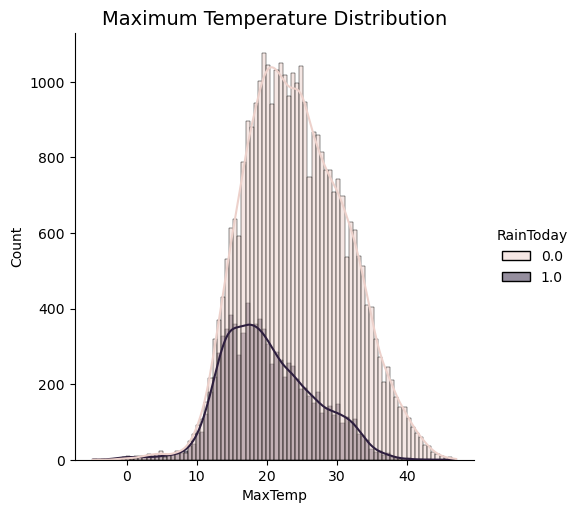

In [30]:
sns.displot(data_test, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

On the other hand, the maximum temperature range from -4.1 ℃ to 48.1 ℃ and the maximum temperature of 20 ℃ has the highest frequency in the data set.

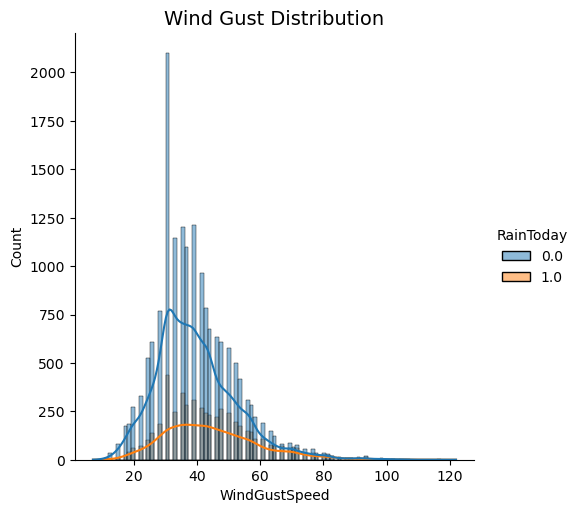

In [31]:
sns.displot(data_test_clean, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

During the analysis, it was found that the range of gusts was from 6 main points to 135 main points and 39.98 main points of gusts had the highest frequency in the data set.

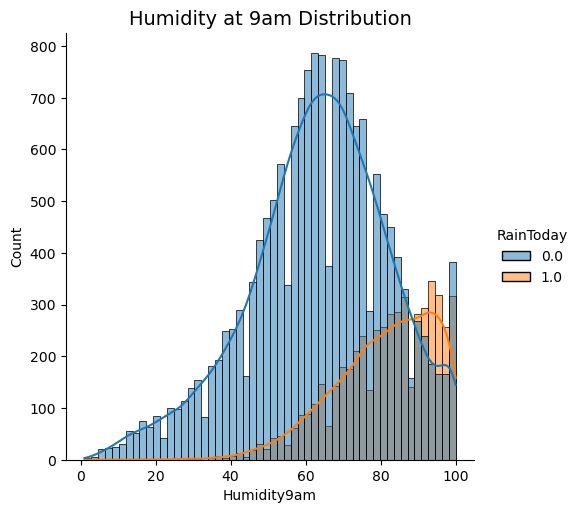

In [32]:
sns.displot(data_test_clean, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it was found that the range of air humidity at 9 o'clock in the morning. and at 3:00 p.m. from 0% to 100% and 99% humidity at 9:00 am. has the highest frequency in the data set.

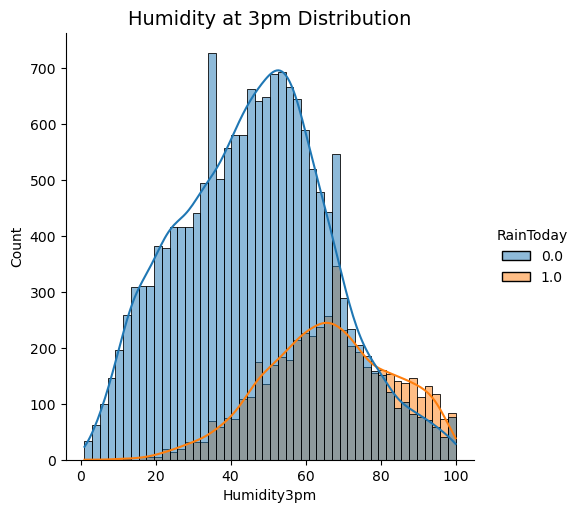

In [33]:
sns.displot(data_test_clean, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 54.43% of humidity at 3 pm has the highest frequency in the dataset.

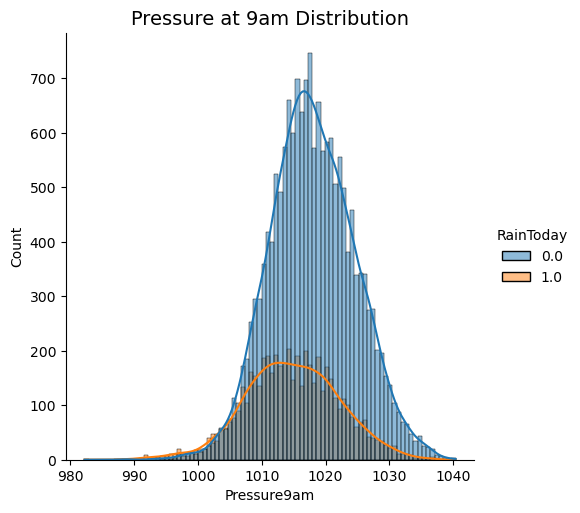

In [34]:
sns.displot(data_test_clean, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it was found that the range of wind pressure at 9 am. ranges from 980.5 hPa to 1042 hPa, and the pressure of 1017.68 hPa has the highest frequency in the data set.

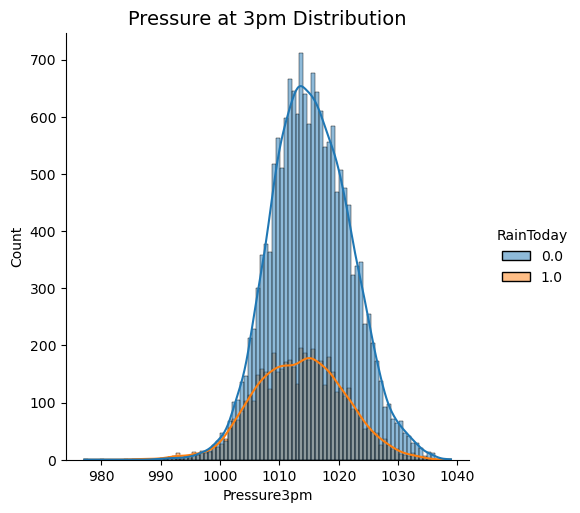

In [35]:
sns.displot(data_test_clean, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

On the opposite hand, the variety of strain at three pm is from 978.2 hPa to 1039.6 hPa and 1015.28 hPa of strain has the very best frequency withinside the dataset.

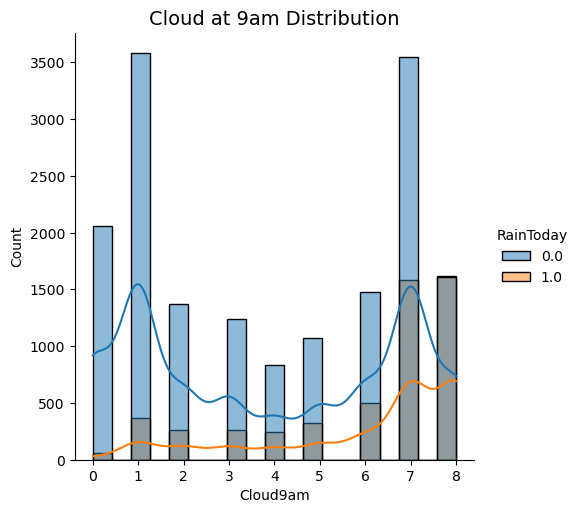

In [36]:
sns.displot(data_test_clean, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it's been determined that the variety of cloud at 9 am and 3 pm is from zero eighths to nine eighths and 4.44 eighths of cloud at nine am has the best frequency withinside the dataset.

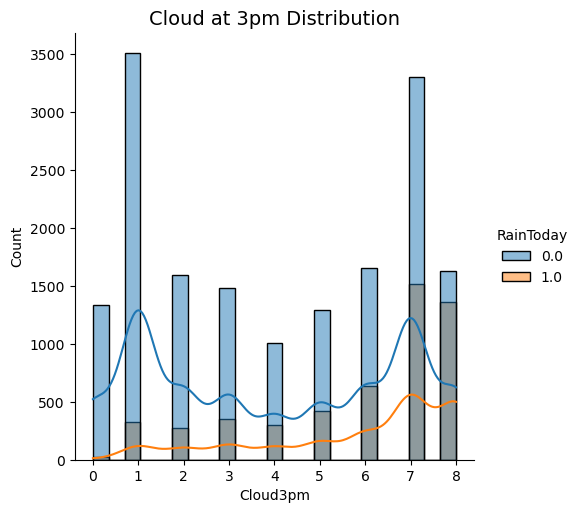

In [37]:
sns.displot(data_test_clean, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 4.52 eighths of cloud at 3 pm has the highest frequency in the dataset.

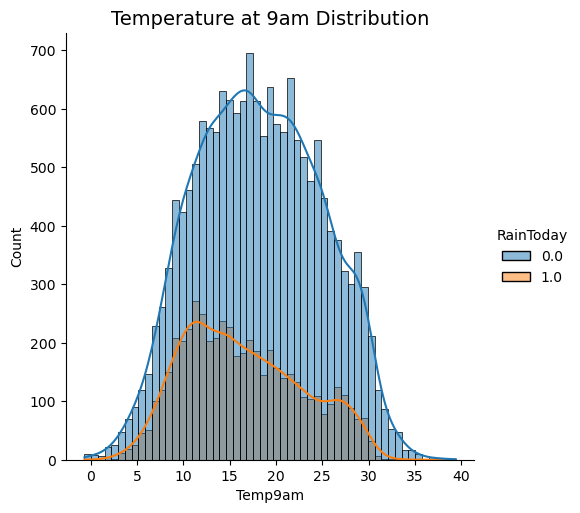

In [38]:
sns.displot(data_test_clean, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind temperature at 9 am is from -7 ℃ to 40.2 ℃ and 17 ℃ of temperature has the highest frequency in the dataset.

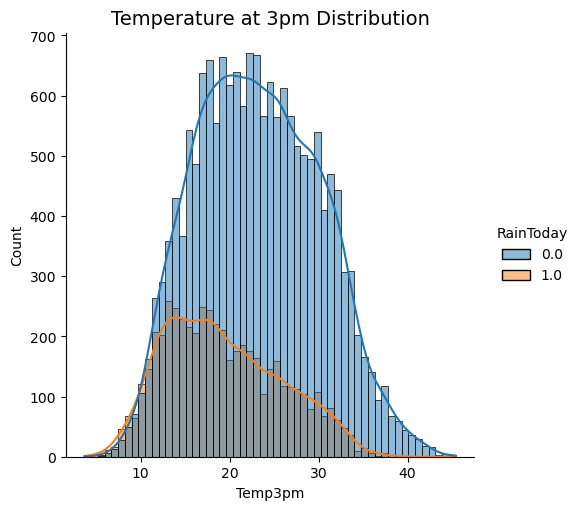

In [39]:
sns.displot(data_test_clean, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of pressure at 3 pm is from -5.1 ℃ to 46.7 ℃ and 27.68 ℃ of temperature has the highest frequency in the dataset.

<Axes: xlabel='Humidity9am', ylabel='Count'>

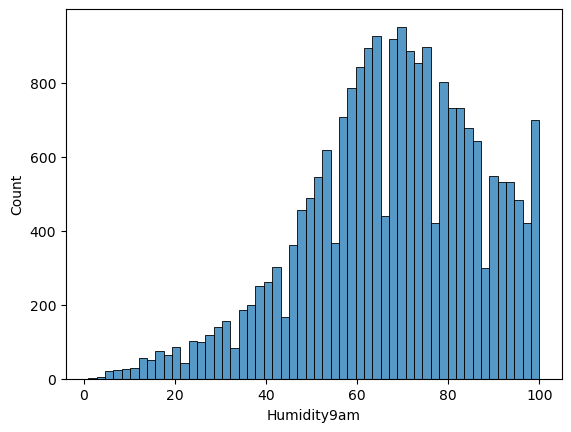

In [40]:
df=data_test_clean
sns.histplot(df['Humidity9am'])

<Axes: xlabel='Humidity3pm', ylabel='Count'>

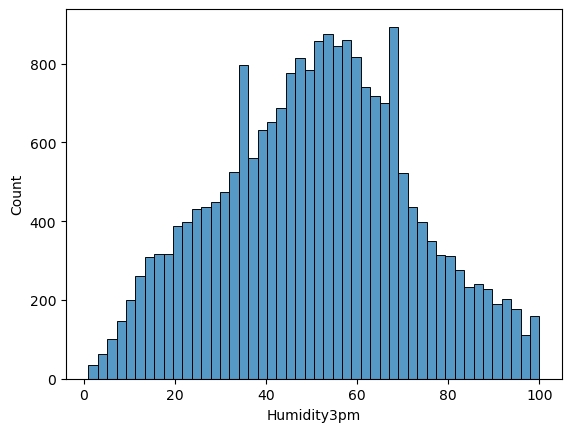

In [41]:
sns.histplot(df['Humidity3pm'])

<Axes: xlabel='Cloud9am', ylabel='Count'>

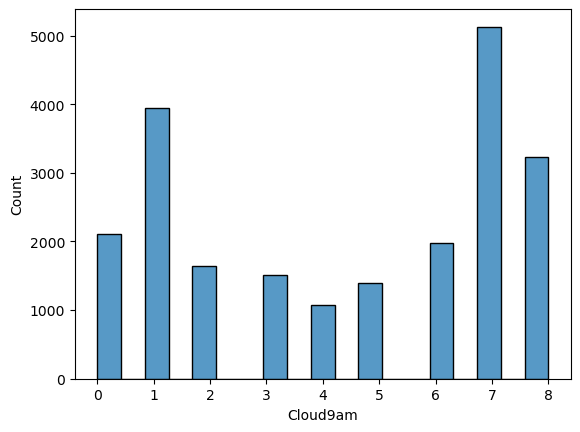

In [42]:
sns.histplot(df['Cloud9am'])

<Axes: xlabel='Cloud3pm', ylabel='Count'>

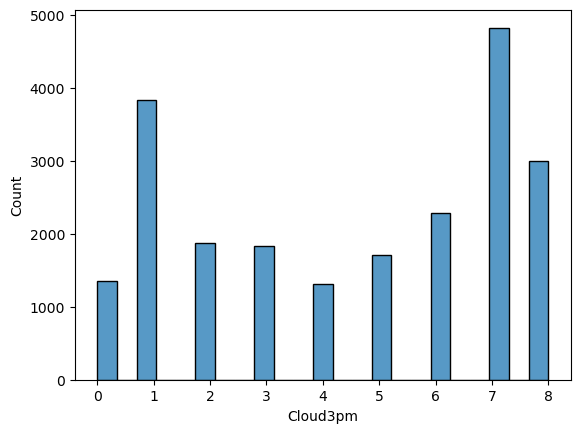

In [43]:
sns.histplot(df['Cloud3pm'])

<Axes: xlabel='RainToday', ylabel='Count'>

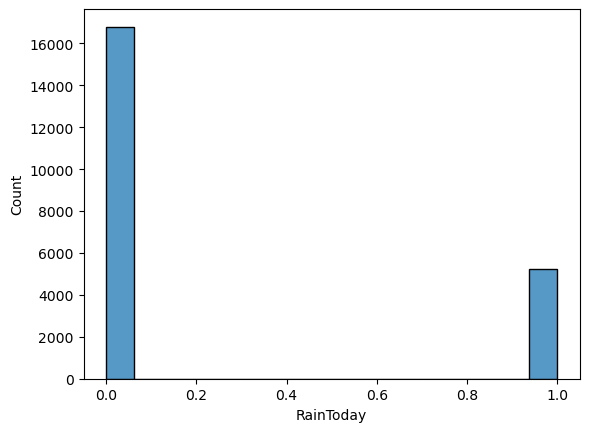

In [44]:
sns.histplot(df['RainToday'])

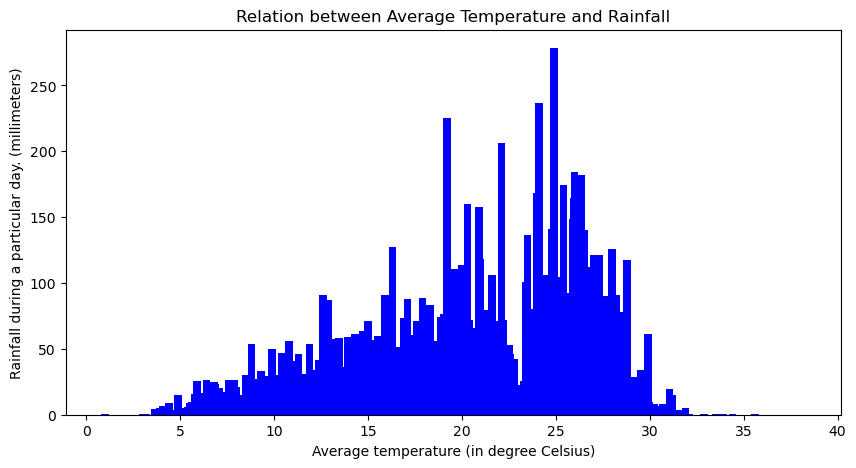

In [45]:
x = list(data_test_clean.MeanTemp)
y = list(data_test_clean.Rainfall)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
 
plt.xlabel("Average temperature (in degree Celsius)")
plt.ylabel("Rainfall during a particular day. (millimeters)")
plt.title("Relation between Average Temperature and Rainfall")
plt.show()

In [46]:
import seaborn as sns
import plotly.express as px

figure = px.scatter(data_frame = data_test_clean, x="AvgHumidity",
                    y="MeanTemp", size="AvgHumidity", 
                    trendline="ols", 
                    labels={
                     "AvgHumidity": "Humidity (in percent)",
                     "MeanTemp": "Mean Temperature (in degree Celsius)"
                 },
                    title = "Relationship Between Temperature and Humidity")
figure.show()

## 2. Average WindSpeed Analysis

In [47]:
windspeed_weather_df = data_test_clean.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

Location  WindSpeed9am  WindSpeed3pm
0        Albury      9.329412     14.917647
1  AliceSprings     14.983226     18.234839
2      Ballarat     20.282051     23.811355
3       Bendigo     12.936709     17.231465
4      Brisbane      6.852476     11.093783

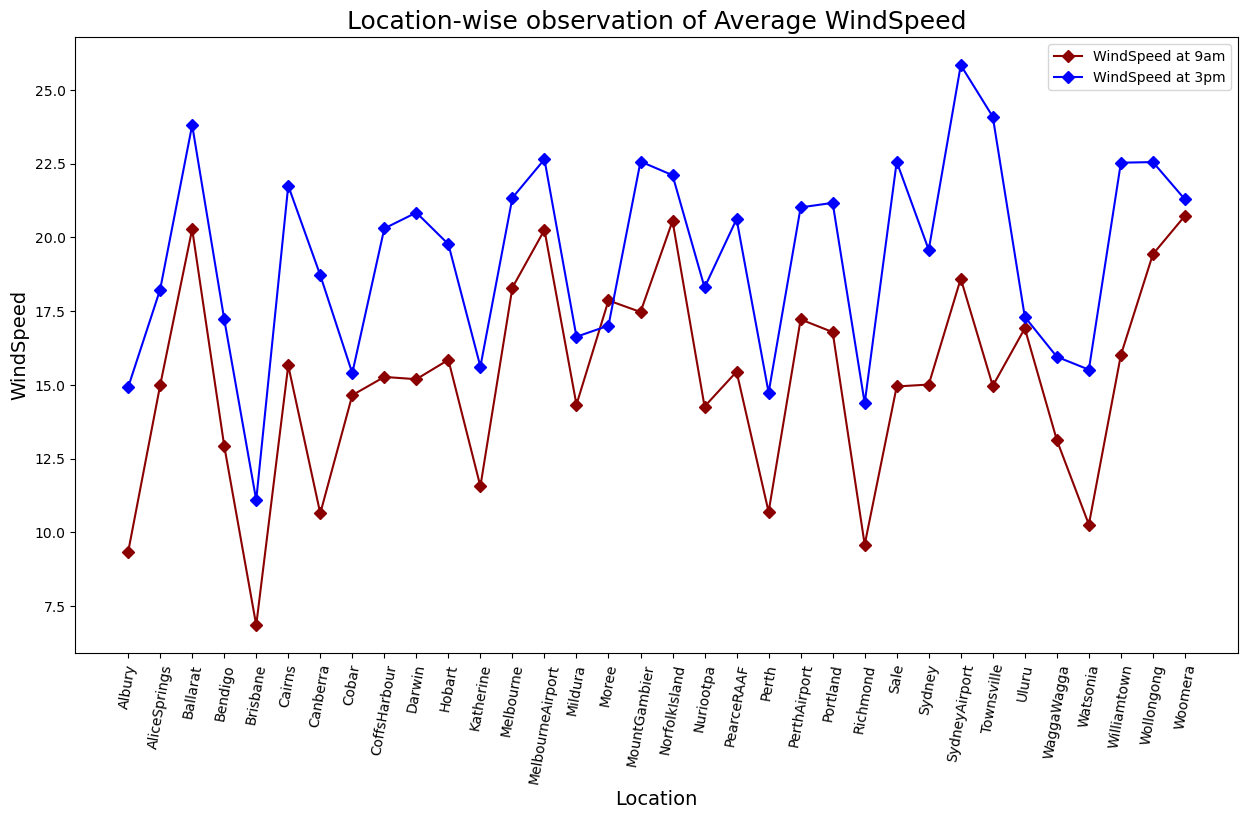

In [48]:
x = windspeed_weather_df.loc[:, 'Location']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkred', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'blue', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

From this analysis, the wind speed at Melbourne Airport was determined to be the highest at 9:00 AM. with a speed of 20.29 km/h. On the other hand, at 3 o'clock in the afternoon. The highest wind speed is on the Gold Coast of Australia with 25.77 km/h. It can be concluded that the wind speed at 15:00. it is much higher than the wind speed at 9 o'clock in the morning.

## 3. Average Humidity Analysis

In [49]:
humidity_weather_df = data_test_clean.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

Location  Humidity9am  Humidity3pm
0        Albury    84.035294    64.003922
1  AliceSprings    39.014194    23.975484
2      Ballarat    88.426740    69.368132
3       Bendigo    73.815552    51.305606
4      Brisbane    64.385669    54.328767

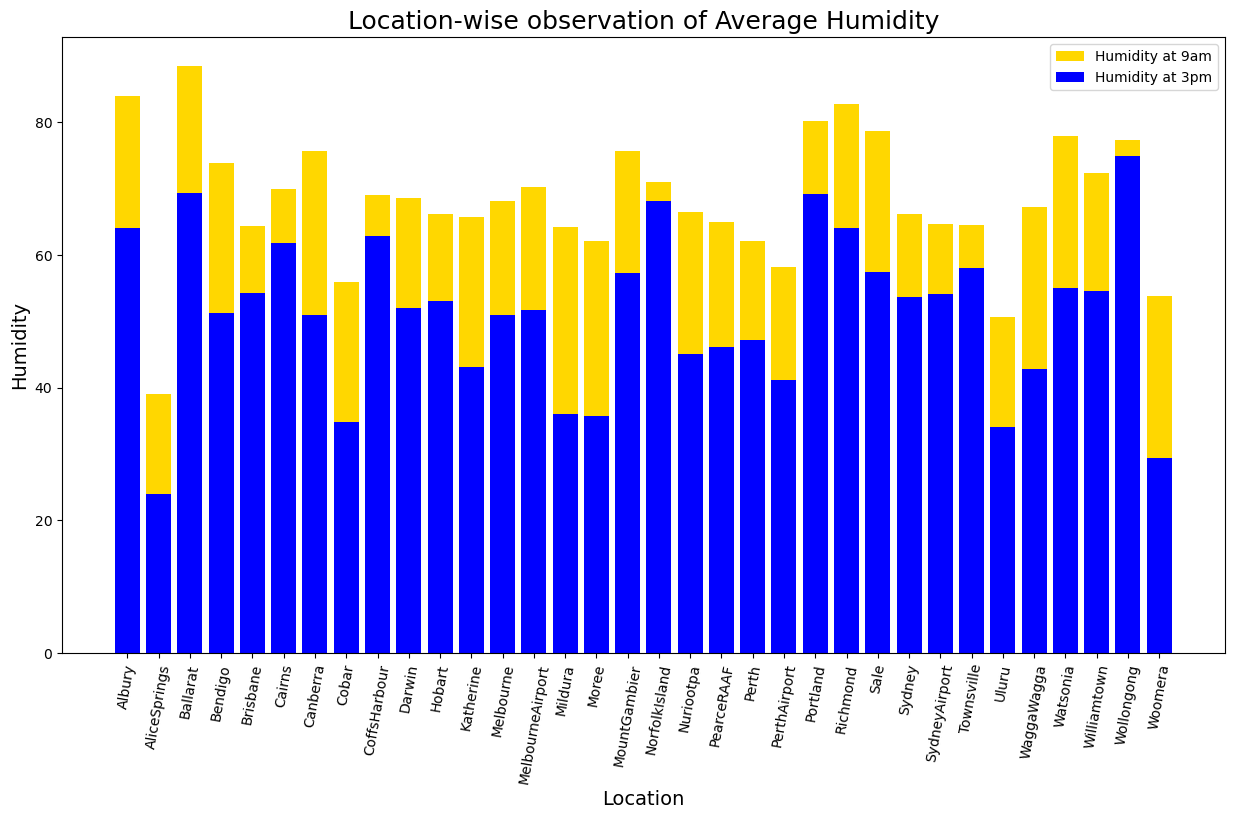

In [50]:
x = humidity_weather_df.loc[:, 'Location']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'blue',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Location-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

From this analysis it was found that the humidity of Dartmoor was highest at 9 am. 84.38%. On the other hand, at 3:00 p.m., Australia's Mount Ginnie has the highest humidity at 68.24%. In conclusion, it can be concluded that the humidity at 9 o'clock is much higher than the wind speed at 3 o'clock.

## 4. Average Pressure Analysis

In [51]:
pressure_weather_df = data_test_clean.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

Location  Pressure9am  Pressure3pm
0        Albury  1016.599216  1014.494118
1  AliceSprings  1016.876000  1013.058194
2      Ballarat  1016.019597  1014.966484
3       Bendigo  1017.266727  1015.336347
4      Brisbane  1018.162065  1015.057534

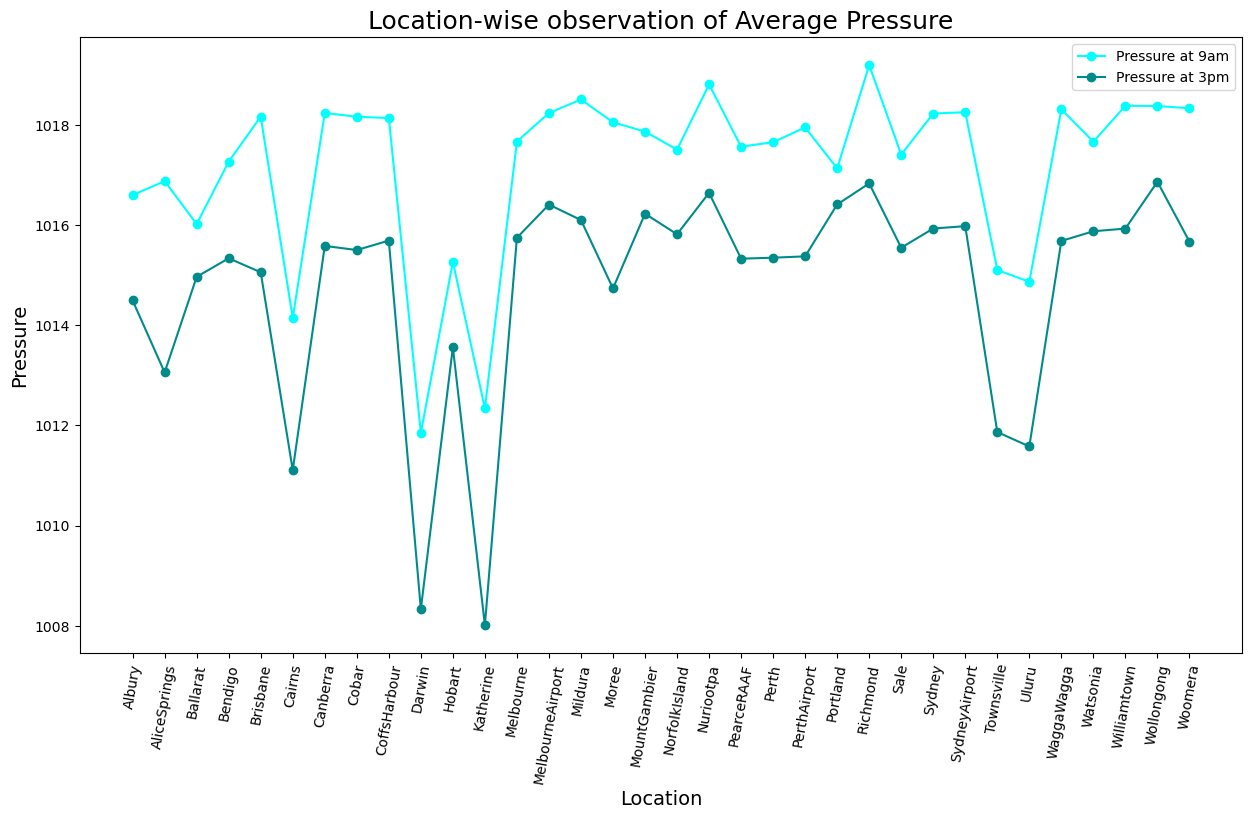

In [52]:
x = pressure_weather_df.loc[:, 'Location']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'cyan', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Location-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it was found that the pressure in Canberra is the highest at 9 o'clock in the morning. at 1018.93 hPa. On the other hand, Adelaide, Australia has the highest pressure at 15:00 at 1016.79 hPa. In short, it can be concluded that the pressure at 9 o'clock is much higher than the wind speed at 3 o'clock.

## 5. Average Temperature Analysis

In [53]:
location_weather_df = data_test_clean.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

Location    MinTemp    MaxTemp    Temp9am    Temp3pm
0        Albury   9.367451  18.802353  12.731373  17.346275
1  AliceSprings  13.075097  29.101032  21.285032  27.846710
2      Ballarat   7.053846  15.498535  10.174542  13.897619
3       Bendigo   8.526944  20.297830  13.260217  18.893852
4      Brisbane  16.482403  26.497998  21.874605  24.773235

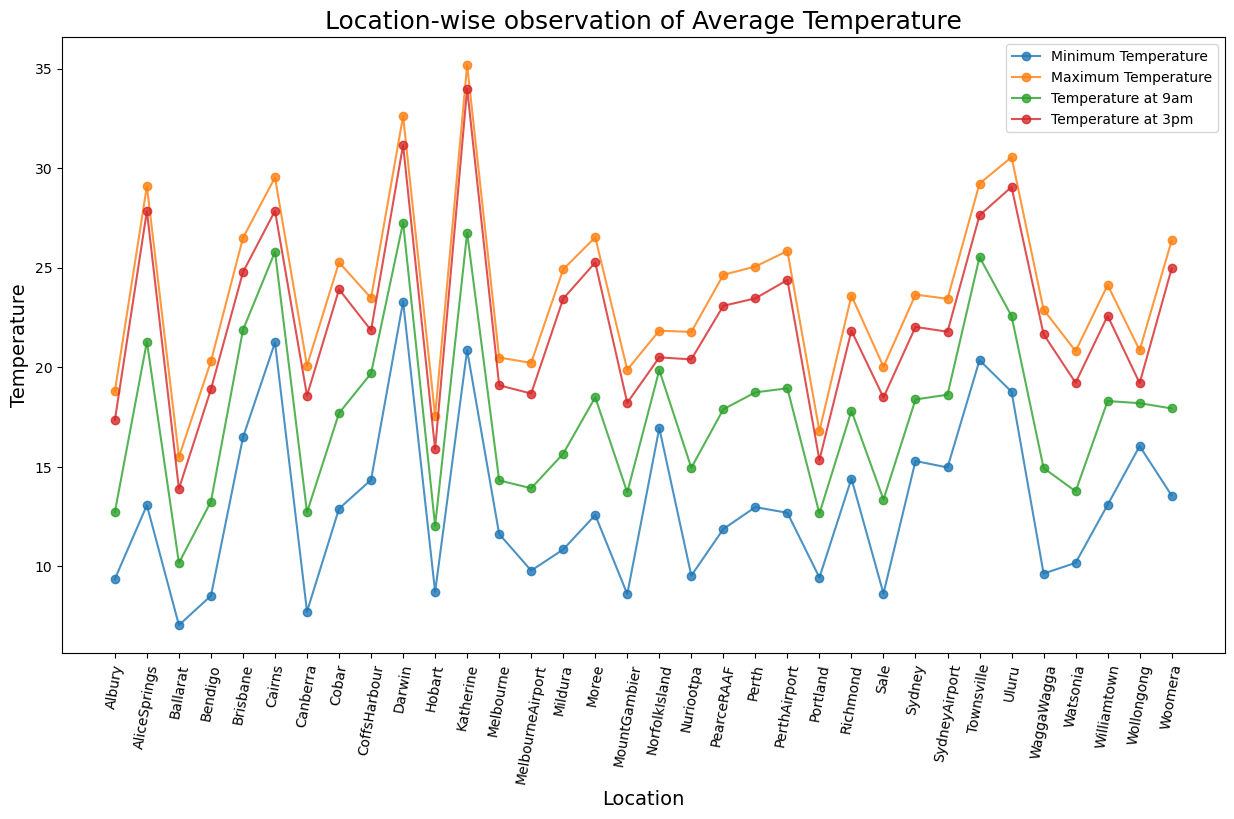

In [54]:
x = location_weather_df.loc[:, 'Location']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Location-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Finding the list of positive integer numbers from the dataset

In [55]:
import pandas as pd
# Select the columns containing the numerical data
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm']

# Create an empty list to store the positive integer numbers
positive_integers = []

# Iterate over each column
for column in numerical_columns:
    # Filter out positive integers from the column
    positive_values = data_test_clean[column][(data_test_clean[column] > 0) & (data_test_clean[column] % 1 == 0)]
    # Append the positive integers to the list
    positive_integers.extend(positive_values.tolist())

# Print the list of positive integer numbers
print("List of positive integer numbers:")
print(positive_integers)


List of positive integer numbers:
[8.0, 3.0, 5.0, 10.0, 17.0, 5.0, 7.0, 6.0, 6.0, 2.0, 8.0, 5.0, 17.0, 19.0, 15.0, 26.0, 1.0, 8.0, 16.0, 9.0, 6.0, 16.0, 20.0, 23.0, 21.0, 10.0, 12.0, 21.0, 27.0, 22.0, 18.0, 9.0, 8.0, 10.0, 4.0, 1.0, 9.0, 12.0, 9.0, 15.0, 11.0, 12.0, 22.0, 26.0, 18.0, 24.0, 24.0, 13.0, 21.0, 4.0, 7.0, 17.0, 18.0, 12.0, 3.0, 4.0, 4.0, 12.0, 13.0, 20.0, 10.0, 13.0, 13.0, 15.0, 13.0, 3.0, 7.0, 16.0, 8.0, 21.0, 19.0, 24.0, 18.0, 14.0, 21.0, 24.0, 14.0, 3.0, 4.0, 6.0, 17.0, 14.0, 4.0, 7.0, 12.0, 13.0, 9.0, 20.0, 10.0, 7.0, 5.0, 18.0, 22.0, 19.0, 16.0, 15.0, 16.0, 7.0, 12.0, 5.0, 10.0, 18.0, 20.0, 21.0, 24.0, 23.0, 18.0, 8.0, 6.0, 6.0, 16.0, 20.0, 17.0, 20.0, 18.0, 21.0, 12.0, 15.0, 8.0, 13.0, 17.0, 19.0, 18.0, 16.0, 12.0, 12.0, 14.0, 16.0, 12.0, 19.0, 19.0, 18.0, 13.0, 18.0, 12.0, 14.0, 12.0, 17.0, 14.0, 19.0, 20.0, 23.0, 22.0, 21.0, 16.0, 13.0, 8.0, 10.0, 10.0, 6.0, 3.0, 2.0, 12.0, 7.0, 14.0, 15.0, 19.0, 21.0, 16.0, 16.0, 12.0, 10.0, 10.0, 13.0, 8.0, 16.0, 19.0, 17.0, 18.0,

### Mean & Standard Deviation

In [56]:
import pandas as pd
# Select the columns for which you want to calculate the mean
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
           'Temp9am', 'Temp3pm', 'RainToday']

# Calculate the mean for each column
mean_values = data_test_clean[columns].mean()

# Print the mean for each column
print("Mean for each column:")
print(mean_values)

Mean for each column:
MinTemp            13.067384
MaxTemp            23.757944
Rainfall            2.607705
WindGustSpeed      40.702467
WindSpeed9am       15.289355
WindSpeed3pm       19.530689
Humidity9am        67.574395
Humidity3pm        50.937849
Pressure9am      1017.232752
Pressure3pm      1014.843160
Cloud9am            4.389851
Cloud3pm            4.464132
Temp9am            17.721812
Temp3pm            22.254868
RainToday           0.236882
dtype: float64


In [57]:
import pandas as pd

# Select the columns for which you want to calculate the standard deviation
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
           'Temp9am', 'Temp3pm', 'RainToday']

# Calculate the standard deviation for each column
std_values = data_test_clean[columns].std()

# Print the standard deviation for each column
print("Standard deviation for each column:")
print(std_values)


Standard deviation for each column:
MinTemp           6.555005
MaxTemp           7.168013
Rainfall          9.561675
WindGustSpeed    13.460367
WindSpeed9am      8.575474
WindSpeed3pm      8.577614
Humidity9am      19.042966
Humidity3pm      20.979821
Pressure9am       6.974059
Pressure3pm       6.918889
Cloud9am          2.869173
Cloud3pm          2.720248
Temp9am           6.682983
Temp3pm           7.037965
RainToday         0.425179
dtype: float64


In [58]:
positive_integers_arr = np.array(positive_integers)

# Calculate the mean
mean_value = np.mean(positive_integers_arr)

# Calculate the standard deviation
std_deviation = np.std(positive_integers_arr)

# Print the mean and standard deviation
print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)

Mean: 55.44756431308156
Standard Deviation: 161.17613215998992


## Kruskal's algorithm
The following code block will perform Kruskal's algorithm on the dataset with 'RainToday' as the dependent variable and the other variables as independent variables. This non-parametric test is used when the dependent variable is categorical.

In [59]:
from scipy import stats

# Extract the variables from the dataset
MinTemp = data_test_clean['MinTemp']
MaxTemp = data_test_clean['MaxTemp']
Rainfall = data_test_clean['Rainfall']
WindGustSpeed = data_test_clean['WindGustSpeed']
WindSpeed9am = data_test_clean['WindSpeed9am']
WindSpeed3pm = data_test_clean['WindSpeed3pm']
Humidity9am = data_test_clean['Humidity9am']
Humidity3pm = data_test_clean['Humidity3pm']
Pressure9am = data_test_clean['Pressure9am']
Pressure3pm = data_test_clean['Pressure3pm']
Cloud9am = data_test_clean['Cloud9am']
Cloud3pm = data_test_clean['Cloud3pm']
Temp9am = data_test_clean['Temp9am']
Temp3pm = data_test_clean['Temp3pm']
RainToday = data_test_clean['RainToday']

# Perform Kruskal-Wallis H test
hvalue, pvalue = stats.kruskal(MinTemp, MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am,
                               Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm)

# Print the results
print("Kruskal-Wallis H test results:")
print("H-value:", hvalue)
print("p-value:", pvalue, end="\n\n")
print('Can we reject H0 ?')
print('Yes' if pvalue<0.01 else 'No')
print('(There is a {}% chance of falsely obtaining this result)'.format(pvalue*100))

Kruskal-Wallis H test results:
H-value: 264106.9374832491
p-value: 0.0

Can we reject H0 ?
Yes
(There is a 0.0% chance of falsely obtaining this result)


The kruskal function from the scipy.stats module is used to perform the Kruskal-Wallis H test. The resulting hvalue is the test statistic, and the pvalue is the associated p-value. Lower p-values indicate a higher likelihood of a significant difference in the 'RainToday' values across the independent variables.

## Models

In [60]:
X = df_upsampled.drop(columns='RainTomorrow')
y = df_upsampled['RainTomorrow']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=44)

In [62]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', max_depth=17, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9804006278711425
RandomForestClassifierModel Test Score is :  0.9274235355106273


In [63]:
from sklearn.metrics import f1_score, accuracy_score

# Predict labels for training and test sets
y_train_pred = RandomForestClassifierModel.predict(X_train)
y_test_pred = RandomForestClassifierModel.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print('F1 Score:', f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:', accuracy)

F1 Score: 0.9293464547060308
Accuracy: 0.9274235355106273


In [64]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Build and train your model
# fit your model on training data

# Save your trained model
joblib.dump(RandomForestClassifierModel, 'RandomForestClassifierModel.joblib')


['RandomForestClassifierModel.joblib']

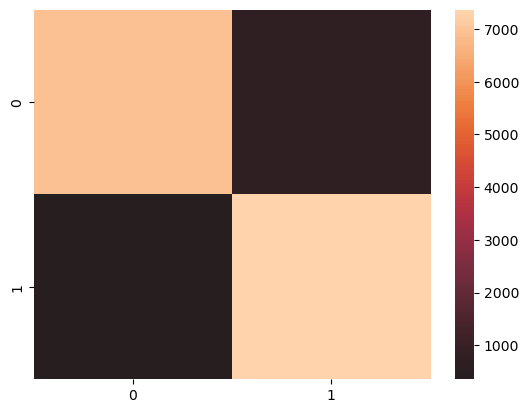

Confusion Matrix is
 [[6946  763]
 [ 357 7366]]


In [65]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [66]:
GBCModel = GradientBoostingClassifier(n_estimators=200, max_depth=11, learning_rate=0.07, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9900923085785055
GBCModel Test Score is :  0.9331907724209435


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

X = df_upsampled.drop(columns='RainTomorrow')
y = df_upsampled['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=44)

GradientBoostingClassifierModel = GradientBoostingClassifier(n_estimators=200, max_depth=11, learning_rate=0.07, random_state=44)
GradientBoostingClassifierModel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.07, max_depth=11, n_estimators=200,
                           random_state=44)

In [68]:
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
# Predict labels for training and test sets
y_train_pred = GradientBoostingClassifierModel.predict(X_train)
y_test_pred = GradientBoostingClassifierModel.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print('F1 Score:', f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:', accuracy)


GBCModel Train Score is :  0.9900923085785055
GBCModel Test Score is :  0.9331907724209435
F1 Score: 0.93528340970435
Accuracy: 0.9331907724209435


In [69]:
joblib.dump(GBCModel, 'GBCModel.joblib')

['GBCModel.joblib']

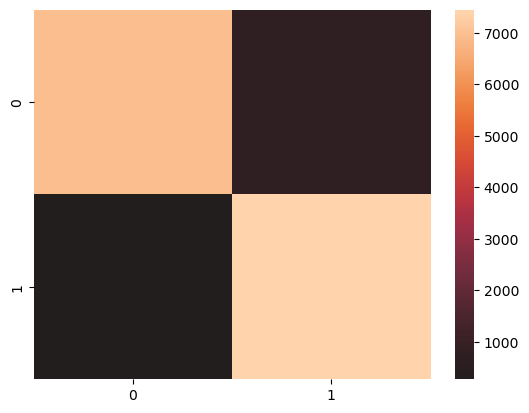

Confusion Matrix is
 [[6951  758]
 [ 273 7450]]


In [70]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [71]:
y_pred = GBCModel.predict(test)

<Axes: ylabel='count'>

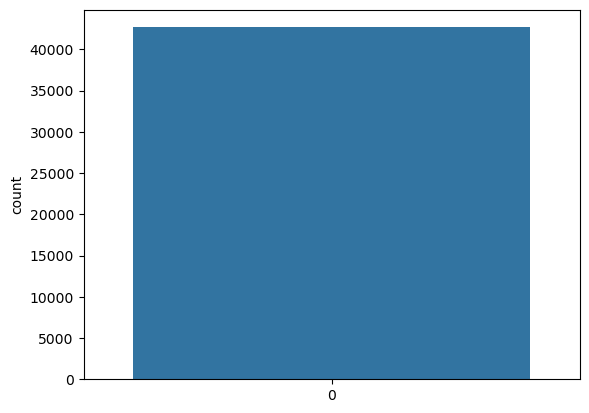

In [72]:
sns.countplot(y_pred)

In [73]:
test = pd.read_csv('WeatherTestData.csv')
submission = test[["row ID"]]
submission["RainTomorrow"] = y_pred

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_20957/1624392679.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
submission.to_csv('predict_weather.csv', index=False)

Two different testing algorithms that we use:

1. Randomized Search Cross Validation for Hyperparameter Tuning:
This algorithm randomly selects a set of hyperparameters and uses cross-validation to evaluate the model's performance. It then repeats this process multiple times and selects the best set of hyperparameters that give the highest accuracy score.

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# create a RandomizedSearchCV object
rscv = RandomizedSearchCV(
    estimator=rfc, param_distributions=param_grid,
    n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1
)

# fit the RandomizedSearchCV object on the training data
rscv.fit(X_train, y_train)

# print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", rscv.best_params_)
print("Best Accuracy Score:", rscv.best_score_)

# evaluate the model on the test data
rfc_best = rscv.best_estimator_
print("Test Accuracy Score:", rfc_best.score(X_test, y_test))

joblib.dump(rfc, 'rfc.joblib')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  20.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  22.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  23.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1

/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.3s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  21.0s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.2s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.3s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  21.2s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  22.9s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.7s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.7s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.6s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.6s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  22.0s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  22.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  22.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  21.9s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.4s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.5s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.4s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.7s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  28.1s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  27.7s


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  27.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  27.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  27.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=None, max_f

['rfc.joblib']

2. Receiver Operating Characteristic (ROC) Curve:
This algorithm is used to evaluate the performance of a binary classifier at different classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values. The area under the ROC curve (AUC-ROC) is a performance metric that ranges from 0.5 to 1. A higher AUC-ROC indicates better model performance.

['gbc.joblib']

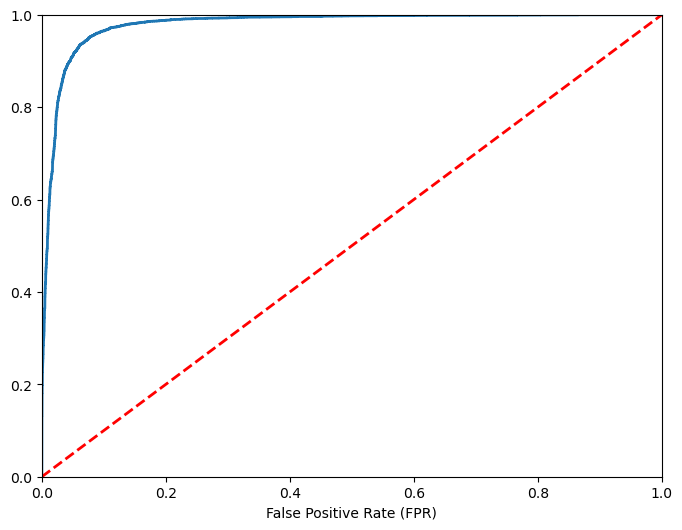

In [76]:
from sklearn.metrics import roc_curve, auc

# fit the Gradient Boosting Classifier on the training data
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=11, learning_rate=0.07, random_state=44)
gbc.fit(X_train, y_train)

# predict the probabilities of the positive class for the test data
y_proba = gbc.predict_proba(X_test)[:, 1]

# calculate the False Positive Rate (FPR), True Positive Rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# calculate the Area Under the Curve (AUC-ROC)
auc_roc = auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
joblib.dump(gbc, 'gbc.joblib')

In [77]:
print(fpr, tpr)

[0.         0.         0.         ... 0.87624854 0.87624854 1.        ] [0.00000000e+00 1.29483361e-04 6.47416807e-04 ... 9.99870517e-01
 1.00000000e+00 1.00000000e+00]


The DummyClassifier in scikit-learn does not require explicit training or fitting since it employs simple rules for prediction based on the specified strategy. The strategy='most_frequent' strategy used in your code instructs the DummyClassifier to always predict the most frequent class in the training data. Hence, the model does not learn from the data during training.

DummyClassifier from scikit-learn, which provides a simple strategy for generating predictions.

DummyClassifier Test Score is :  0.49954639709694143


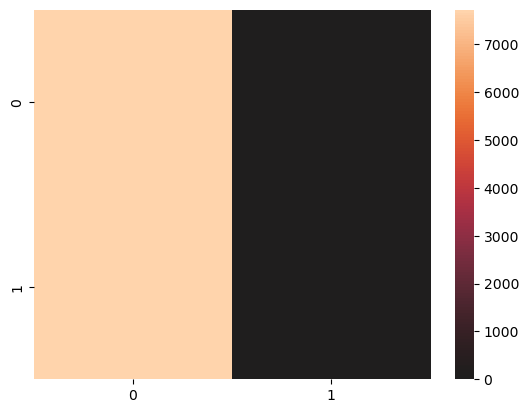

Confusion Matrix is
 [[7709    0]
 [7723    0]]


In [78]:
# import necessary modules
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create a new instance of the classifier
dummy = DummyClassifier(strategy='most_frequent')

# fit the model on the training data
dummy.fit(X_train, y_train)

# predict on the test data
y_pred_dummy = dummy.predict(X_test)

# evaluate the model
print('DummyClassifier Test Score is : ', dummy.score(X_test, y_test))

# calculate and print the confusion matrix
CM_dummy = confusion_matrix(y_test, y_pred_dummy)
sns.heatmap(CM_dummy, center=True)
plt.show()
print('Confusion Matrix is\n', CM_dummy)

<br><br><br><br>
<h3><center>End of Assignment</center></h3>
<center><h4>
<a href="https://github.com/hemangsharma/Assignmnet2_DSI_36100">Github Link</a>
</h4></center>